<a href="https://colab.research.google.com/github/Davidmenamm/Reinforcement-Learning---PPO-Algorithm-Communication/blob/main/PPO_Make_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


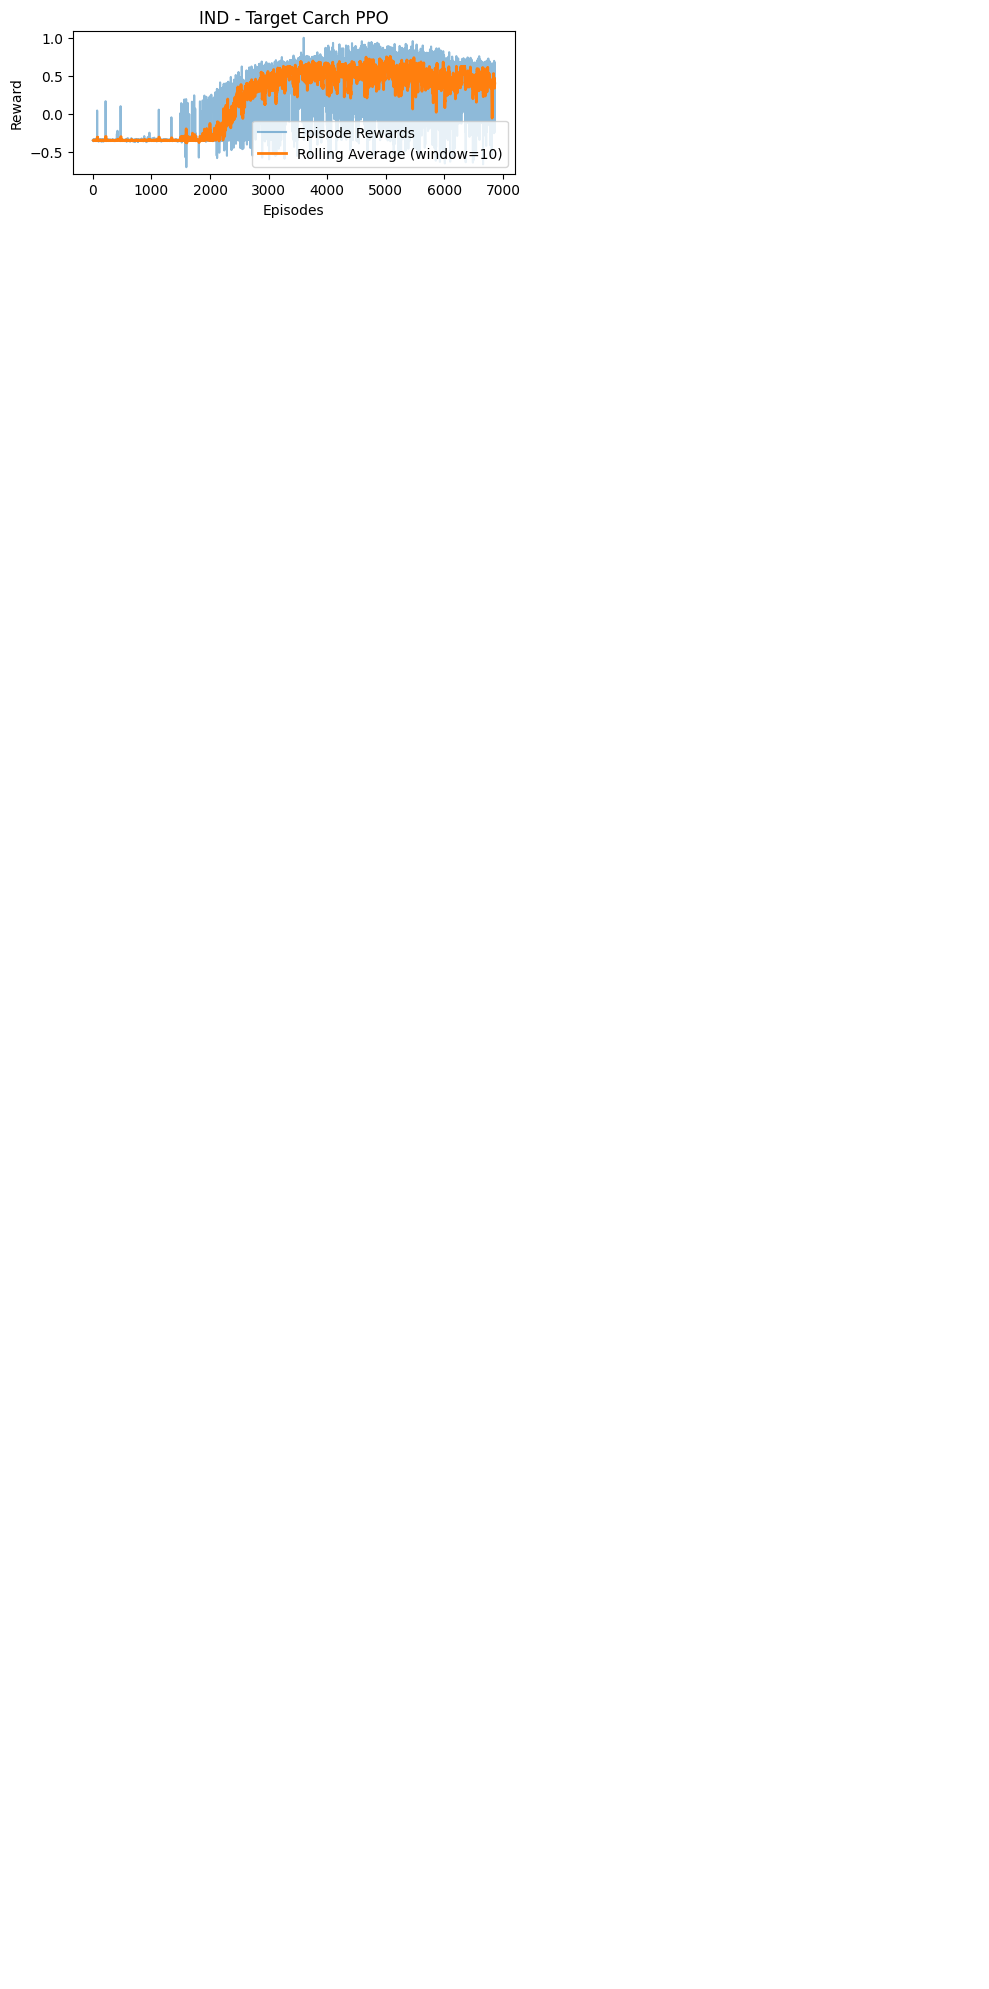

PNG file saved at: /content/results/rewards_matrix_vertical.png
PDF file saved at: /content/results/rewards_matrix_vertical.pdf


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MaxAbsScaler
import os

# Function to normalize rewards using min-max normalization
def normalize_rewards(rewards):
    vector_rewards = rewards.reshape(-1, 1)
    scaler = MaxAbsScaler()
    normalized_vector = scaler.fit_transform(vector_rewards)
    return normalized_vector.flatten()  # Return as a 1D array

# Function to calculate rolling average
def calculate_rolling_average(rewards, window_size=10):
    if len(rewards) >= window_size:
        rolling_avg = np.convolve(rewards, np.ones(window_size), 'valid') / window_size
        x_rolling = np.arange(window_size - 1, len(rewards))
    else:
        rolling_avg = []
        x_rolling = []
    return rolling_avg, x_rolling

# Directory containing the reward files
# reward_files_directory = "/content/drive/My Drive/PPO/Graph/Pettingzoo - Target Circle/"
# reward_files_directory = "/content/drive/My Drive/PPO/Graph/Pettingzoo - Drone Hover/"
# reward_files_directory = "/content/drive/My Drive/PPO/Graph/Pettingzoo - Waterworld/"
# reward_files_directory = "/content/drive/My Drive/PPO/Graph/Pettingzoo - Multiwalker/"
# reward_files_directory = "/content/drive/My Drive/PPO/Graph/Pettingzoo - Drone Surround/"
# reward_files_directory = "/content/drive/My Drive/PPO/Graph/Pettingzoo - Drone Hover/"
reward_files_directory = "/content/drive/My Drive/PPO/Graph/Pettingzoo - Target Catch/"
# Ensure the directory exists
if not os.path.exists(reward_files_directory):
    raise FileNotFoundError(f"The directory {reward_files_directory} does not exist.")

# Get the list of reward files
reward_files = [f for f in os.listdir(reward_files_directory) if f.endswith('.txt')]

# Number of files and at least 1000 episodes per file
num_files = len(reward_files)

# Save the figure as a PNG and PDF file with 4x2 vertical layout
fig, axes = plt.subplots(10, 2, figsize=(10, 20))  # Adjusted figsize for vertical layout

window_size = 10  # Rolling average window size

for i, ax in enumerate(axes.flat):
    if i < num_files:
        # Read rewards from the file
        file_path = os.path.join(reward_files_directory, reward_files[i])
        with open(file_path, 'r') as file:
            rewards = []
            for line in file.readlines():
                try:
                    # Clean the line and convert to float
                    reward = float(line.strip().replace(',', ''))
                    rewards.append(reward)
                except ValueError:
                    # Skip lines that cannot be converted to float
                    continue

        # Normalize the rewards
        rewards = normalize_rewards(np.array(rewards))

        # Calculate rolling average
        rolling_avg, x_rolling = calculate_rolling_average(rewards, window_size)

        # Plot the rewards
        ax.plot(np.arange(len(rewards)), rewards, alpha=0.5, label='Episode Rewards')
        if len(rolling_avg) > 0:
            ax.plot(x_rolling, rolling_avg, label=f'Rolling Average (window={window_size})', linewidth=2)

        ax.set_title(reward_files[i].replace('.txt', ''))
        ax.set_xlabel('Episodes')
        ax.set_ylabel('Reward')
        ax.legend()
    else:
        ax.axis('off')  # Turn off the axis for empty plots

plt.tight_layout()
output_directory = "/content/results"
os.makedirs(output_directory, exist_ok=True)
png_file_vertical = os.path.join(output_directory, "rewards_matrix_vertical.png")
pdf_file_vertical = os.path.join(output_directory, "rewards_matrix_vertical.pdf")
plt.savefig(png_file_vertical)
plt.savefig(pdf_file_vertical)
plt.show()

print(f"PNG file saved at: {png_file_vertical}")
print(f"PDF file saved at: {pdf_file_vertical}")


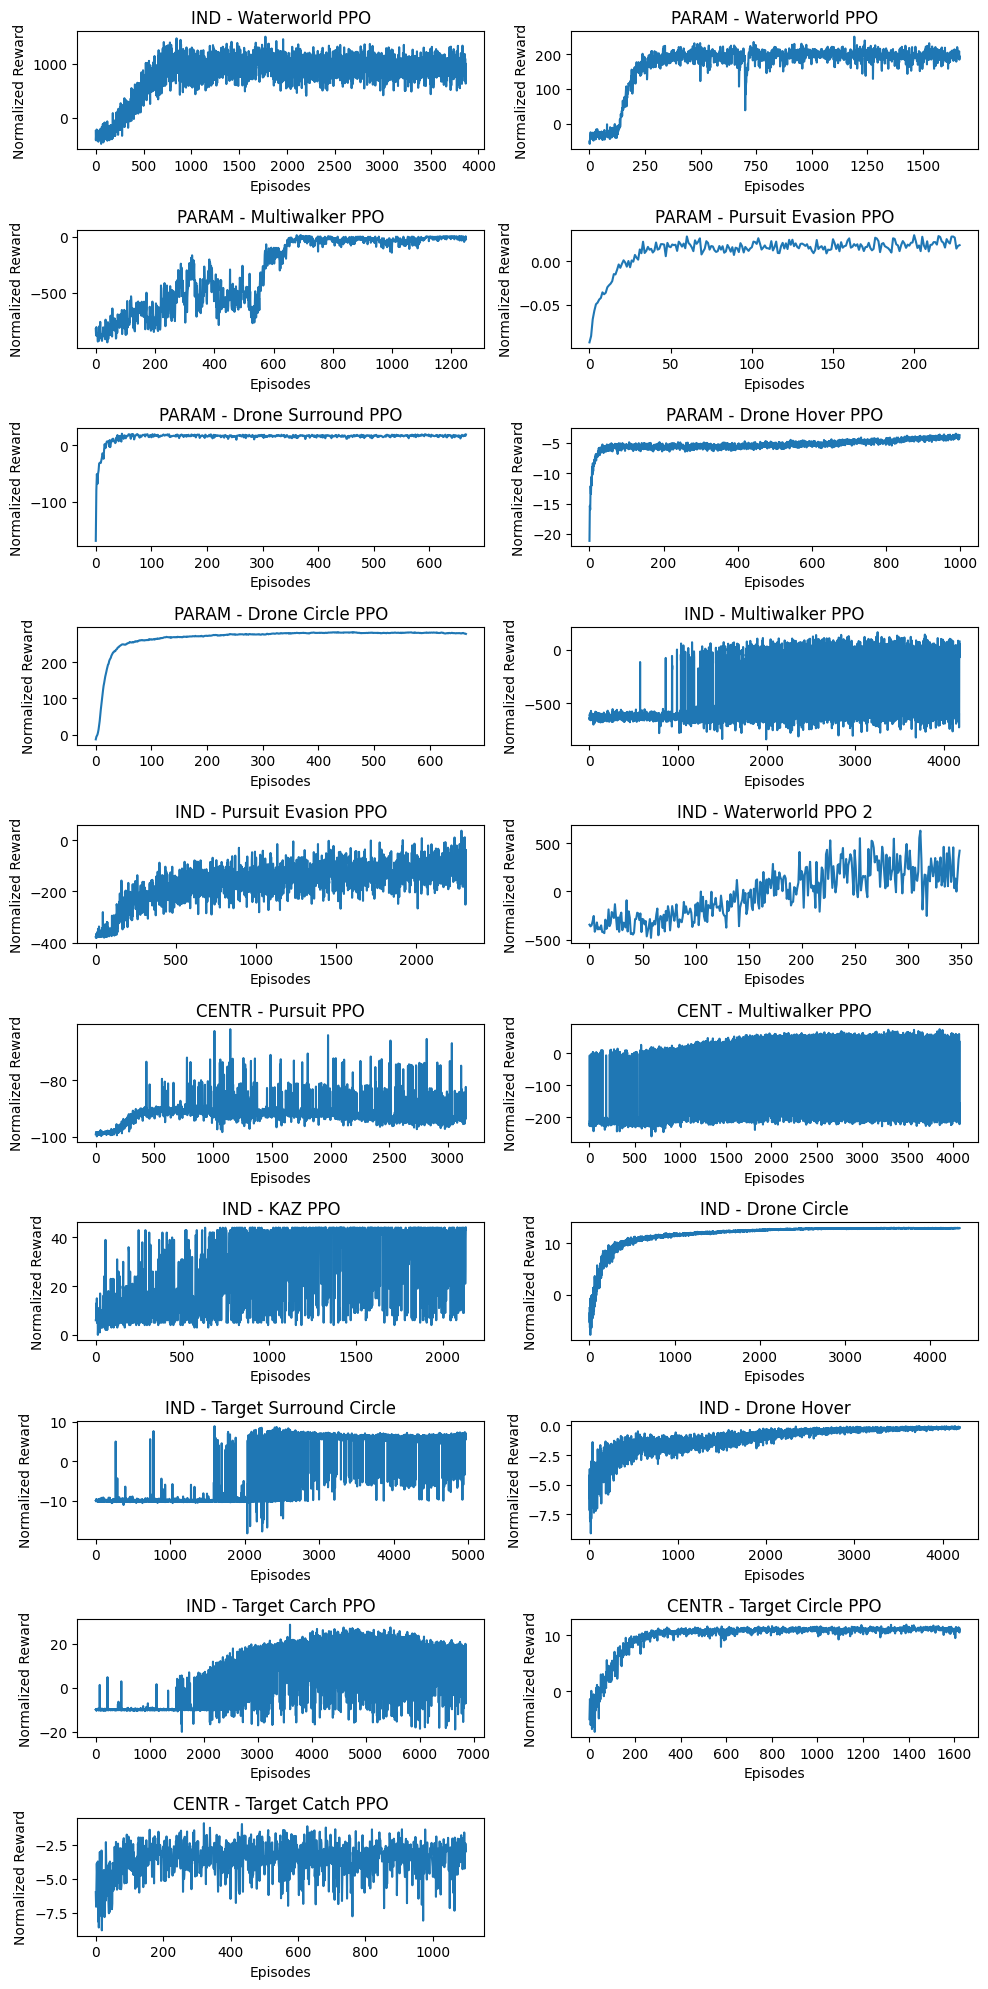

PNG file saved at: /content/results/rewards_matrix_vertical.png
PDF file saved at: /content/results/rewards_matrix_vertical.pdf


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
import os

# Function to normalize rewards using min-max normalization
def normalize_rewards(rewards):
    vector_rewards = rewards.reshape(-1, 1)
    scaler = MaxAbsScaler()
    normalized_vector = scaler.fit_transform(vector_rewards)
    return normalized_vector

# Directory containing the reward files
reward_files_directory = "/content/drive/My Drive/PPO/Graph"  # Update this path with actual directory

# Ensure the directory exists
if not os.path.exists(reward_files_directory):
    raise FileNotFoundError(f"The directory {reward_files_directory} does not exist.")

# Get the list of reward files
reward_files = [f for f in os.listdir(reward_files_directory) if f.endswith('.txt')]

# Ensure there are reward files in the directory
if not reward_files:
    raise FileNotFoundError(f"No .txt files found in the directory {reward_files_directory}.")

# Number of files and at least 1000 episodes per file
num_files = len(reward_files)

# Save the figure as a PNG and PDF file with 4x2 vertical layout
fig, axes = plt.subplots(10, 2, figsize=(10, 20))  # Adjusted figsize for vertical layout

for i, ax in enumerate(axes.flat):
    if i < num_files:
        # Read rewards from the file
        file_path = os.path.join(reward_files_directory, reward_files[i])
        with open(file_path, 'r') as file:
            rewards = []
            for line in file.readlines():
                try:
                    # Clean the line and convert to float
                    reward = float(line.strip().replace(',', ''))
                    rewards.append(reward)
                except ValueError:
                    # Skip lines that cannot be converted to float
                    continue
        # Normalize the rewards
        # rewards = normalize_rewards(np.array(rewards))

        # Plot the normalized rewards
        ax.plot(np.arange(len(rewards)), rewards)
        ax.set_title(reward_files[i].replace('.txt', ''))
        ax.set_xlabel('Episodes')
        ax.set_ylabel('Normalized Reward')
    else:
        ax.axis('off')  # Turn off the axis for empty plots

plt.tight_layout()
output_directory = "/content/results"
os.makedirs(output_directory, exist_ok=True)
png_file_vertical = os.path.join(output_directory, "rewards_matrix_vertical.png")
pdf_file_vertical = os.path.join(output_directory, "rewards_matrix_vertical.pdf")
plt.savefig(png_file_vertical)
plt.savefig(pdf_file_vertical)
plt.show()

print(f"PNG file saved at: {png_file_vertical}")
print(f"PDF file saved at: {pdf_file_vertical}")
